<a href="https://colab.research.google.com/github/pimentad2020/DSWP/blob/Aula_Dia_06_jan_2021/Notebooks/NB15_02__Regress%C3%A3o%20Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b><i>MACHINE LEARNING WITH PYTHON</i></b></h1></center>
<center><h1><b><i>APRENDIZAGEM SUPERVISIONADA</i></b></h1></center>
<center><h1><b><i>MODELOS DE REGRESSÃO (LINEAR E LOGÍSTICA)</i></b></h1></center>

Fonte: https://realpython.com/linear-regression-in-python/
https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

Passos para implementação da Regressão Linear:

* (1) Importar as libraries necessárias;
* (2) Carregar os dados;
* (3) Aplicar as transformações necessárias: outliers, NaN's, normalização (MinMaxScaler, RobustScaler, StandarScaler, Log, Box-Cox e etc);
* (4) DataViz dos dados: entender os relacionamentos, distribuições e etc presente nos dados;
* (5) Construir e treinar o modelo preditivo (neste caso, modelo de regressão);
* (6) Validar/verificar as métricas para avaliação do(s) modelo(s);
* (7) Predições.

# Melhorias da sessão:
* Calcular as correlações antes e depois da RIDGE e LASSO para mostrar a multicolinearidade e explicar porque determinadas colunas "deixam" de ser importantes.

# Modelos de Regressão com Regularization para Classificação e Regressão

## Regressão Linear Simples (usando OLS - Ordinary Least Squares)

* Features $X_{np}$: é uma matriz de dimensão nxp contendo os atributos/variáveis preditoras do dataframe (variáveis independentes);
* Variável target/dependente representada por y;
* Relação entre X e y é representado pela equação abaixo, onde $w_{i}$ representa os pesos de cada coeficiente e $w_{0}$ representa o intercepto.

<img src="https://github.com/awantik/machine-learning-slides/blob/master/lm1.PNG?raw=true" width="300">

![X_y](https://github.com/MathMachado/Materials/blob/master/Architecture.png?raw=true)

* número de linhas = nr de amostras

* Soma de Quadrados dos Resíduos (RSS) - Soma de Quadrados das diferenças entre os valores observados e preditos.

<img src="https://github.com/awantik/machine-learning-slides/blob/master/lm2.PNG?raw=true" width="500">

## Principais parâmetros do algoritmo:
* fit_intercept - Indica se o intercepto $w_{0}$ deve ou não ser ajustado. Se os dados estão normalizados, então não faz sentido ajustar o intercepto $w_{0}$.

* normalize - $X$ será automaticamente normalizada (subtrai a média e divide pelo desvio-padrão); Transformação StandardScaler

## Atributos do modelo de Machine Learning para Regressão
* coef - peso/fator de cada variável independente do modelo de ML;

* intercepto $w_{0}$ - intercepto ou viés de $y$;

## Funções para ajuste do ML:
* fit - treina o modelo com as matrizes $X$ e $y$;
* predict - Uma vez que o modelo foi treinado, para um dado $X$, use $y$ para calcular os valores preditos de $y$ (y_pred).

<hr/>


$Y = \mu + w_{1}X_{1}+ ..... + w_pX_{p}$

# Limitações do OLS (Ordinary Least Squares):
* Impactado/sensível à Outliers;
* Multicolinearidade; 
* Heterocedasticidade - apresenta-se como uma forte dispersão dos dados em torno de uma reta;

* <a href="http://www.clockbackward.com/2009/06/18/ordinary-least-squares-linear-regression-flaws-problems-and-pitfalls/">References</a>

### Importar as libraries

In [143]:
import numpy as np
import pandas as pd
from scipy import stats

### Carregar os dados
* Vamos carregar o dataset [Boston House Pricing](https://archive.ics.uci.edu/ml/datasets/housing)

In [144]:
from sklearn.datasets import load_boston, load_iris

In [145]:
boston = load_boston()
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [146]:
# Nomes das colunas, variáveis, atributos
load_boston().feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [147]:
#url = 'https://raw.githubusercontent.com/MathMachado/DSWP/master/Dataframes/housing.csv'

# Variáveis preditoras
df_boston = pd.DataFrame(load_boston().data, columns = load_boston().feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [148]:
# Variável target/resposta
df_boston['preco'] = load_boston().target
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,preco
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Data Transformation

#### Normalização/padronização dos nomes das colunas

In [149]:
# Renomear as colunas do dataframe
df_boston.columns = [col.lower() for col in df_boston.columns]

In [150]:
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,preco
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Outliers

#### Missing values

In [151]:
# Missing values por colunas/variáveis
df_boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
preco      0
dtype: int64

In [152]:
# Número de atributos
len(load_boston().feature_names)

13

In [153]:
# Missing Values por linhas
df_boston[df_boston.isnull().any(axis = 1)]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,preco


#### Estatísticas Descritivas

In [154]:
df_boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,preco
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Análise de Correlação

In [155]:
correlacoes = df_boston.corr()
correlacoes

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,preco
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


##### Gráfico das correlações entre as features/variáveis/colunas
Source: https://seaborn.pydata.org/examples/many_pairwise_correlations.html



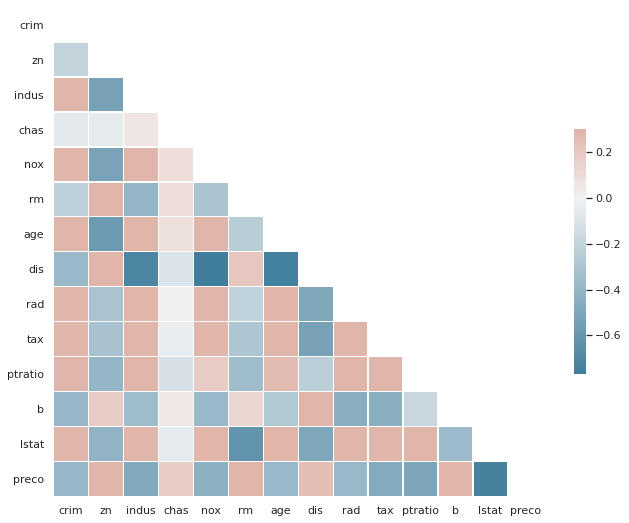

In [156]:
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt

sns.set_theme(style = "white")

d = df_boston

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Construir e treinar o(s) modelo(s)

$X = [X_{1}, X_{2}, X_{p}]$ = X_boston abaixo.

In [157]:
X_boston = df_boston.drop(columns = ['preco'], axis = 1) # todas as variáveis/atributos, exceto 'preco'
y_boston = df_boston['preco'] # variável-target

In [158]:
X_boston.head()    # X_boston é df e y_boston é uma Series

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [159]:
y_boston[0:10] # Series (coluna)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: preco, dtype: float64

In [160]:
# Definindo os dataframes de treinamento e teste:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_boston, 
                                                                  y_boston, 
                                                                  test_size = 0.2, 
                                                                  random_state = 20111974)

In [161]:
print(f"Dataframe de treinamento: {X_treinamento.shape[0]} linhas")
print(f"Dataframe de teste......: {X_teste.shape[0]} linhas")

Dataframe de treinamento: 404 linhas
Dataframe de teste......: 102 linhas


#### Treinamento do modelo de Regressão Linear

In [162]:
# Importa a library LinearRegression --> Para treinamento da Regressão Linear
from sklearn.linear_model import LinearRegression

# Library para statmodels
import statsmodels.api as sm    # semelhante ao R

In [163]:
# Instancia o objeto
regressao_linear = LinearRegression()

In [164]:
# Treina o modelo usando as amostras/dataset de treinamento: X_treinamento e y_treinamento 
regressao_linear.fit(X_treinamento, y_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [165]:
# Valor do intercepto
regressao_linear.intercept_

35.902091875350195

In [166]:
# Coeficientes do modelo de Regressão Linear
coeficientes_regressao_linear = pd.DataFrame([X_treinamento.columns, regressao_linear.coef_]).T
coeficientes_regressao_linear = coeficientes_regressao_linear.rename(columns={0: 'Feature/variável/coluna', 1: 'Coeficientes'})
coeficientes_regressao_linear

,Feature/variável/coluna,Coeficientes
0,crim,-0.0822083
1,zn,0.0428002
2,indus,0.0756011
3,chas,3.16348
4,nox,-19.4945
5,rm,3.98161
6,age,0.00480929
7,dis,-1.37396
8,rad,0.298883
9,tax,-0.0123962


#### Usando statmodels

In [167]:
X2_treinamento = sm.add_constant(X_treinamento)
lm_sm = sm.OLS(y_treinamento, X2_treinamento).fit()
print(lm_sm.summary())

# R-Squared = R2  coeficiente de determinação da reta de regressão  soma dos desvios ao quadrado    R-squared:               0.725
# R-squared: 0.725   varia de 0 a 1     quanto mais próximo de 1, melhor o modelo preditivo  => é uma medida de qualidade do modelo

# retirar do modelo as variáveis que têm p-value (P>|t|) muito elevado  (muito acima de 5%)   recomendável até 10%

# outra forma: se zero faz parte do IC = intervalo de confiança, o coeficeinte não é importante para o modelo    age [-0.025   0.035] => que age pode assumir valor zero

# coeficiente de age é aproximadamente zero

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     78.97
Date:                Thu, 21 Jan 2021   Prob (F-statistic):          1.48e-100
Time:                        10:43:50   Log-Likelihood:                -1214.8
No. Observations:                 404   AIC:                             2458.
Df Residuals:                     390   BIC:                             2514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.9021      6.037      5.947      0.0

#### Exclusão da variável menos significativa para o modelo: 'age'

In [168]:
X3 = X_treinamento.drop(columns = 'age', axis = 1)
X3_treinamento = sm.add_constant(X3)
lm_sm2 = sm.OLS(y_treinamento, X3_treinamento).fit()
print(lm_sm2.summary())

# age, indus, crim   p_value > 5%

# coeficientes da equação de age, indus e crim são aproximadamente zero (não contribuem na equação de regressão)

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     85.75
Date:                Thu, 21 Jan 2021   Prob (F-statistic):          1.64e-101
Time:                        10:43:50   Log-Likelihood:                -1214.8
No. Observations:                 404   AIC:                             2456.
Df Residuals:                     391   BIC:                             2508.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.7325      6.006      5.950      0.0

#### Exclusão da variável menos significativa para o modelo: 'indus'

In [169]:
X4 = X3_treinamento.drop(columns = 'indus', axis = 1)
X4_treinamento = sm.add_constant(X4)
lm_sm3 = sm.OLS(y_treinamento, X4_treinamento).fit()
print(lm_sm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     93.42
Date:                Thu, 21 Jan 2021   Prob (F-statistic):          2.86e-102
Time:                        10:43:50   Log-Likelihood:                -1215.4
No. Observations:                 404   AIC:                             2455.
Df Residuals:                     392   BIC:                             2503.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.4757      6.001      5.911      0.0

#### Exclusão da variável menos significativa para o modelo: 'crim'

In [170]:
X5 = X4_treinamento.drop(columns = 'crim', axis = 1)
X5_treinamento = sm.add_constant(X5)
lm_sm4 = sm.OLS(y_treinamento, X5_treinamento).fit()
print(lm_sm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     101.8
Date:                Thu, 21 Jan 2021   Prob (F-statistic):          1.55e-102
Time:                        10:43:51   Log-Likelihood:                -1217.2
No. Observations:                 404   AIC:                             2456.
Df Residuals:                     393   BIC:                             2500.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.9950      5.968      5.696      0.0

### Conclusão
* Quais variáveis/colunas/atributos ficam no modelo?
* **Muito importante (exercício)**: normalizar (MinMaxScaler, RobustScaler) as covariáveis e refazer a análise. Plotar as variáveis para visualizar o comportamento
* Nesta iteração (depois de excluirmos (nesta ordem) as variáveis age, indus e crim, não surge nenhuma outra variável insignificante ao nível de 5 (na verdade, o maior valor é 1.9%).

|* Construir todas as transformações dos atributos. São geradas os atributos transformados. Estes novos atributos são acrescentados ao modelo de regressão. Analisar os resultados p_values das variáveis transformadas nos mesmos moldes das variáveis originais. Verificar o limite dos 5%. Selecionar as variáveis mais significativas dentre as originais e/ou transformadas

### Validação do(s) modelo(s)

### Predições

### Deployment da solução **analítica**

# Regularized Regression Methods 
## Ridge Regression - Penalized Regression
> Reduz a complexidade do modelo através do uso de todas as variáveis de $X$, mas penalizando (valor de $\alpha$) os coeficientes $w_{i}$ quando estiverem muito longe de zero, forçando-os a serem pequenos de maneira contínua. Dessa forma, diminuímos a complexidade do modelo enquanto mantemos todas as variáveis no modelo.
* Menor impacto dos outliers.

### Exemplo

In [171]:
# Matriz de covariáveis do modelo:
X_new = [[0, 0], [0, 0], [1, 1]]
X_new2 = [[0, 0], [0, 1.5], [1, 1]]

y_new = [0, .1, 1]

In [172]:
X_new # 2 variáveis/colunas no dataframe

[[0, 0], [0, 0], [1, 1]]

In [173]:
y_new

[0, 0.1, 1]

### Sem outliers

In [174]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = .1)
ridge.fit(X_new, y_new)
ridge.coef_ # Coeficientes da Ridge

array([0.44186047, 0.44186047])

### Com outliers

In [175]:

ridge = Ridge(alpha = .1)
ridge.fit(X_new2, y_new)
ridge.coef_

array([0.80918728, 0.07773852])

#### Conseguiram visualizar o impacto dos outliers?

### Aplicação da Regressão Ridge no dataframe Boston Housing Price.

In [176]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1) # Definição do valor de alpha da regressão ridge
lr = LinearRegression()

In [177]:
# Ao inves de: regressao_linear.fit(X_treinamento, y_treinamento)
ridge.fit(X_treinamento, y_treinamento)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

#### Peso/contribuição das variáveis para a regressão usando RIDGE

In [178]:
df_boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'preco'],
      dtype='object')

In [179]:
ridge.coef_

array([-8.08728088e-02,  4.31105323e-02,  6.96774448e-02,  3.14478949e+00,
       -1.79983020e+01,  3.98675653e+00,  3.54464890e-03, -1.35303958e+00,
        2.95042916e-01, -1.25115273e-02, -9.68282109e-01,  9.02744064e-03,
       -5.29135646e-01])

In [180]:
# treinando a regressão Ridge
ridge.fit(X_treinamento, y_treinamento)

# treinando a regressão linear simples (OLS)
lr.fit(X_treinamento, y_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [181]:
ridge.alpha

0.1

#### $\alpha = 0.01$

In [182]:
# maior alpha --> mais restrição aos coeficientes; 
# Menor alpha --> mais generalização, e Ridge se assemelha da OLS; Se alpha = 0 ==> Ridge = OLS.
rr = Ridge(alpha = 100) # Quanto mais próximo de 0 ==> Ridge = OLS
rr.fit(X_treinamento, y_treinamento)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [183]:
# MSE = Erro Quadrático Médio
from sklearn.metrics import mean_squared_error

rr_model=(mean_squared_error(y_true = y_treinamento, y_pred = rr.predict(X_treinamento)))
lr_model=(mean_squared_error(y_true = y_treinamento, y_pred = lr.predict(X_treinamento)))

In [184]:
print(rr_model)

26.460105089888508


In [185]:
print(lr_model)

23.946319854597366


In [186]:
lr.coef_

array([-8.22082576e-02,  4.28002144e-02,  7.56010925e-02,  3.16347639e+00,
       -1.94944869e+01,  3.98160895e+00,  4.80928997e-03, -1.37396263e+00,
        2.98882626e-01, -1.23961601e-02, -9.84656627e-01,  8.94899528e-03,
       -5.26477792e-01])

### Coeficientes da Ridge:

In [187]:
# Lista das variáveis + coeficientes da Ridge:
# penalizar / regularizar => reduzir ainda mais o impacto da variável para no modelo preditivo (coeficiente aprox zero)
list(zip(X_treinamento.columns, abs(ridge.coef_)))

[('crim', 0.08087280884194979),
 ('zn', 0.0431105323320636),
 ('indus', 0.06967744483334821),
 ('chas', 3.144789492713716),
 ('nox', 17.9983019701622),
 ('rm', 3.9867565296916703),
 ('age', 0.0035446489044452497),
 ('dis', 1.3530395756206453),
 ('rad', 0.29504291572154007),
 ('tax', 0.012511527307639232),
 ('ptratio', 0.9682821087614826),
 ('b', 0.009027440635645128),
 ('lstat', 0.5291356457993021)]

### Experimente vários outros valores para $\alpha$ como, por exemplo, $\alpha = 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000$

#### $\alpha = 100$

In [188]:
rr100 = Ridge(alpha = 100)
rr100.fit(X_treinamento, y_treinamento)
train_score=lr.score(X_treinamento, y_treinamento)
test_score=lr.score(X_teste, y_teste)
Ridge_treinamento_score = rr.score(X_treinamento,y_treinamento)

In [189]:
# MSE
rr100_model = (mean_squared_error(y_true = y_treinamento, y_pred = rr100.predict(X_treinamento)))
lr_model = (mean_squared_error(y_true = y_treinamento, y_pred = lr.predict(X_treinamento)))

In [190]:
print(rr100_model)

26.460105089888508


In [191]:
print(lr_model)

23.946319854597366


In [192]:
rr100.coef_   # coeficientes se distanciam do zero com alpha = 1000

array([-0.08155198,  0.05460349,  0.00722678,  0.66852988, -0.21801153,
        2.09623294,  0.00801334, -1.02133904,  0.32516721, -0.01665642,
       -0.85733517,  0.00905645, -0.70685343])

### Próximo passo: fazer o statmodel dos modelos ridge.

# LASSO (Least Absolute Shrinkage And Selection Operator regularization)
* Método mais comum e usado para Regularization; 
* Reduz overfitting;
* Se encarrega do **Feature Selection**, pois descarta variáveis altamente correlacionadas.

* Usado no processo de Regularization - processo de penalizar as variáveis para manter somente os atributos mais importantes. Pense na utilidade disso diante de um dataframe com muitas variáveis;
* A regressão Lasso vem com um parâmetro ($\alpha$), e quanto maior o alfa, a maioria dos coeficientes de recurso é zero. Ou seja, quando $\alpha = 0$, a regressão Lasso produz os mesmos coeficientes que uma regressão linear. Quando alfa é muito grande, todos os coeficientes são zero.

### Exemplo LASSO

In [193]:
X_new

[[0, 0], [0, 0], [1, 1]]

In [194]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = .1)
lasso.fit(X_new, y_new)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [195]:
lasso.coef_

array([0.5, 0. ])

### Aplicação do LASSO no Boston Housing Price

In [196]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = .1)
lasso.fit(X_treinamento, y_treinamento)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [197]:
lasso.coef_

array([-6.53050169e-02,  4.69929493e-02,  2.03045631e-03,  1.56638852e+00,
       -0.00000000e+00,  3.77954671e+00, -6.40432403e-03, -1.06129312e+00,
        2.58073061e-01, -1.42708307e-02, -7.81773992e-01,  9.95091849e-03,
       -5.87452824e-01])

### Coeficientes do LASSO:

In [198]:
list(zip(X_treinamento.columns, abs(lasso.coef_)))

[('crim', 0.06530501689285828),
 ('zn', 0.04699294932304524),
 ('indus', 0.002030456305853612),
 ('chas', 1.5663885184641415),
 ('nox', 0.0),
 ('rm', 3.779546713514268),
 ('age', 0.006404324032734558),
 ('dis', 1.0612931166345525),
 ('rad', 0.2580730613206583),
 ('tax', 0.014270830653978057),
 ('ptratio', 0.7817739916684686),
 ('b', 0.009950918490594119),
 ('lstat', 0.5874528237350962)]

### Comparação com os coeficientes do RIDGE:

In [199]:
list(zip(X_treinamento.columns, abs(ridge.coef_)))

[('crim', 0.08087280884194979),
 ('zn', 0.0431105323320636),
 ('indus', 0.06967744483334821),
 ('chas', 3.144789492713716),
 ('nox', 17.9983019701622),
 ('rm', 3.9867565296916703),
 ('age', 0.0035446489044452497),
 ('dis', 1.3530395756206453),
 ('rad', 0.29504291572154007),
 ('tax', 0.012511527307639232),
 ('ptratio', 0.9682821087614826),
 ('b', 0.009027440635645128),
 ('lstat', 0.5291356457993021)]

In [200]:
# nox para regularização lasso é insignificante   coeficiente = 0.0
# nox para regularização ridge é importante   coeficiente = 17.998

# age para regularização lasso é insignificante   coeficiente = 0.0064
# age para regularização ridge é insignificante   coeficiente = 0.0035

# https://medium.com/turing-talks/turing-talks-20-regress%C3%A3o-de-ridge-e-lasso-a0fc467b5629

# https://medium.com/turing-talks/turing-talks-10-introdu%C3%A7%C3%A3o-%C3%A0-predi%C3%A7%C3%A3o-a75cd61c268d


**Conclusão**: Coeficientes zero podem ser excluídos da Análise/modelo.

### Efeito dos valores de $\alpha$
* Função adaptada de https://chrisalbon.com/machine_learning/linear_regression/effect_of_alpha_on_lasso_regression/.

In [201]:
# Create a function called lasso,
def lasso(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = names
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        lasso = Lasso(alpha = alpha)
        
        # Fit the lasso regression
        lasso.fit(X_treinamento, y_treinamento)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = lasso.coef_
        
    # Return the datafram    
    return df

In [202]:
names = X_treinamento.columns

# Valores de alpha:
lasso([.0001, .001, 0, .01, .1, 1, 10, 100])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4837.156610628664, tolerance: 3.514187175742573
  positive)


,Feature Name,Alpha = 0.000100,Alpha = 0.001000,Alpha = 0.000000,Alpha = 0.010000,Alpha = 0.100000,Alpha = 1.000000,Alpha = 10.000000,Alpha = 100.000000
0,crim,-0.082177,-0.081898,-0.082208,-0.079113,-0.065305,-0.043175,-0.000000,-0.000000
1,zn,0.042807,0.042870,0.042800,0.043501,0.046993,0.046511,0.022907,0.000000
2,indus,0.075467,0.074263,0.075601,0.062217,0.002030,0.000000,-0.000000,-0.000000
3,chas,3.161817,3.146879,3.163476,2.997491,1.566389,0.000000,0.000000,0.000000
4,nox,-19.459924,-19.148839,-19.494487,-16.038598,-0.000000,-0.000000,0.000000,-0.000000
5,rm,3.981502,3.980542,3.981609,3.970900,3.779547,0.767123,0.000000,0.000000
6,age,0.004784,0.004558,0.004809,0.002299,-0.006404,0.027700,0.000000,-0.000000
7,dis,-1.373444,-1.368773,-1.373963,-1.322091,-1.061293,-0.603672,-0.000000,0.000000
8,rad,0.298800,0.298060,0.298883,0.290667,0.258073,0.263029,0.000000,-0.000000
9,tax,-0.012399,-0.012425,-0.012396,-0.012688,-0.014271,-0.014111,-0.007210,-0.018972


### Capturando os elementos mais importantes

VEJA: https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

### Cross-Validation & GridSearch para LASSO

### Colocar aqui a fórmula do RMSE.

In [203]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

In [204]:
# define model evaluation method
cv = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 20111974)

In [205]:
# define model
# alpha começa em 0.001 vai até 10 com incremento de 0.001
# ESCOLHER O MELHOR VALOR de alpha

model = LassoCV(alphas = np.arange(0.001, 10, 0.001), cv = cv, n_jobs = -1)

In [206]:
# fit model
model.fit(X_treinamento, y_treinamento)

LassoCV(alphas=array([1.000e-03, 2.000e-03, 3.000e-03, ..., 9.997e+00, 9.998e+00,
       9.999e+00]),
        copy_X=True,
        cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=20111974),
        eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=-1,
        normalize=False, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [207]:
# r_squared = model.r_squared   # RSS - qto o modelo explica da variabilidade dos dados R-squared  statsmodel
# r_squared_adj = model.r_squared_adj
# coeficientes_regressao = model.params

In [208]:
# summarize chosen configuration   alpha adequado: 0.001000 => considerar as variáveis a este nível de alpha
print('alpha: %f' % model.alpha_)

alpha: 0.001000


# Elastic Net  
* Combina o poder de Ridge e LASSO;
* Remove variáveis de pouco poder preditivo (LASSO) ou as penaliza (Ridge).

In [209]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Instancia o objeto
en = ElasticNet(alpha = .1)

transformacao.fit(dados_que_eu_quero_transformar)

In [210]:
X_treinamento

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
176,0.07022,0.0,4.05,0.0,0.510,6.020,47.2,3.5549,5.0,296.0,16.6,393.23,10.11
65,0.03584,80.0,3.37,0.0,0.398,6.290,17.8,6.6115,4.0,337.0,16.1,396.90,4.67
291,0.07886,80.0,4.95,0.0,0.411,7.148,27.7,5.1167,4.0,245.0,19.2,396.90,3.56
341,0.01301,35.0,1.52,0.0,0.442,7.241,49.3,7.0379,1.0,284.0,15.5,394.74,5.49
319,0.47547,0.0,9.90,0.0,0.544,6.113,58.8,4.0019,4.0,304.0,18.4,396.23,12.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,0.32264,0.0,21.89,0.0,0.624,5.942,93.5,1.9669,4.0,437.0,21.2,378.25,16.90
424,8.79212,0.0,18.10,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16
42,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81
444,12.80230,0.0,18.10,0.0,0.740,5.854,96.6,1.8956,24.0,666.0,20.2,240.52,23.79


In [211]:
y_treinamento

176    23.2
65     23.5
291    37.3
341    32.7
319    21.0
       ... 
136    17.4
424    11.7
42     25.3
444    10.8
379    10.2
Name: preco, Length: 404, dtype: float64

In [212]:
en.fit(X_treinamento, y_treinamento)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [213]:
list(zip(X_treinamento, en.coef_))

[('crim', -0.07143751053094904),
 ('zn', 0.0498062892363724),
 ('indus', 0.0032576429776668353),
 ('chas', 1.3239836713973603),
 ('nox', -0.11664802487965203),
 ('rm', 3.2904034517697442),
 ('age', -0.003099848702137109),
 ('dis', -1.0767387220229074),
 ('rad', 0.2808232363611885),
 ('tax', -0.015070381582031977),
 ('ptratio', -0.8133764497234329),
 ('b', 0.009703976555020394),
 ('lstat', -0.6218862788685706)]

### GridSearch para encontrar o $\alpha$ para Elastic Net

In [214]:
# Instancia o objeto:
en1 = ElasticNet(normalize = True)

In [215]:
# Otimização dos hiperparâmetros:
d_hiperparametros = {'alpha': np.logspace(-5, 2, 8), 
                     'l1_ratio': [.2, .4, .6, .8]}

In [216]:
search = GridSearchCV(estimator = en1, # Elastic Net
                      param_grid = d_hiperparametros, # Dicionário com os hiperparâmetros
                      scoring = 'neg_mean_squared_error', # MSE (Erro Quadrático Médio) - Métrica para avaliação da performance do modelo
                      #scoring = 'neg_mean_squared_error',
                      n_jobs = -1, # Usar todos os processadores/computação
                      refit = True, 
                      cv = 10) # Número de Cross-Valitations
search                      

GridSearchCV(cv=10, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=True,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [217]:
search.fit(X_treinamento, y_treinamento)


GridSearchCV(cv=10, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=True,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [218]:
search.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.4}

In [219]:
en2 = ElasticNet(normalize = True, alpha = 0.001, l1_ratio = 0.6)
en2

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.6,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [220]:
en2.fit(X_treinamento, y_treinamento)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.6,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [221]:
# Métrica
# neg_mean_squared_error métrica não disponível em sklearn.metrics

from sklearn.metrics import mean_squared_error
ml2 = (mean_squared_error(y_true = y_teste, y_pred = en2.predict(X_teste)))

# ml3 = (neg_mean_squared_error(y_true = y_teste, y_pred = en2.predict(X_teste)))

In [222]:
print(ml2)
# print(ml3)

15.410850398354441


* Conclusão: A regressão sem Regularization produziu MSE de 23.94
Com ElasticNet produz MSE de 15.4
Quanto menor o erro (MSE) melhor o modelo

### Exercício (Estatística): Sugestão de ajuste manual
* Estudar estatisticamente a distribuição de frequência em que a variável é significante (ao nível de 5%) em 100 fits.

In [223]:
# Sugestão de ajuste manual - próxima célula

In [224]:
# for i in range(0, 100):
 #   X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, 0.2)
 #   modeloi = fit(X_treinamento, y_treinamento)
    # intercepto
    # coeficientes da regressão
    # validação dos parâmetros (significância)
    # y_predict = predict(X_teste)

In [225]:
search.fit(X_treinamento, y_treinamento)

# Retorna os melhores hiperparâmetros do algoritmo:
search.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.4}

In [226]:
en2 = ElasticNet(normalize = True, alpha = 0.001, l1_ratio = 0.6)
en2.fit(X_treinamento, y_treinamento)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.6,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [227]:

# Métrica
ml2 = (mean_squared_error(y_true = y_teste, y_pred = en2.predict(X_teste)))
# Encontrar a métrica neg_squared_error --> ml3 = (neg_mean_squared_error(y_true = y_teste, y_pred = en2.predict(X_teste)))

In [228]:
print(f"MSE: {ml2}")

MSE: 15.410850398354441


**Conclusão**:
* Comparação dos MSE - A Regressão sem Regularization produziu MSE de 23.94. Como podemos ver, Elastic Net produz MSE: 15.4.

### Coeficientes do Elastic Net:

In [229]:
list(zip(X_treinamento.columns, abs(ridge.coef_)))

[('crim', 0.08087280884194979),
 ('zn', 0.0431105323320636),
 ('indus', 0.06967744483334821),
 ('chas', 3.144789492713716),
 ('nox', 17.9983019701622),
 ('rm', 3.9867565296916703),
 ('age', 0.0035446489044452497),
 ('dis', 1.3530395756206453),
 ('rad', 0.29504291572154007),
 ('tax', 0.012511527307639232),
 ('ptratio', 0.9682821087614826),
 ('b', 0.009027440635645128),
 ('lstat', 0.5291356457993021)]

Observe acima que o segundo coeficiente foi estimado como 0 e, desta forma, podemos excluí-lo do ML.

# Elastic Net  
* Combina o poder de Ridge e LASSO;
* Remove variáveis de pouco poder preditivo (LASSO) ou as penaliza (Ridge).

In [230]:
from sklearn.linear_model import ElasticNet

# Instancia o objeto
en = ElasticNet(alpha = .1)

In [231]:
en.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [232]:
en.coef_

array([0.32589556, 0.32579954])

# Regressão Logística

* Na regressão linear nós tentamos modelar a relação linear entre as features ($X_{np} = [X_{1}, X_{2}, ..., X_{p}]$) através de uma reta dada pela equação:

$$\hat{y}= \beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{p}x_{p}$$

Para classificação, a Regressão Logística vai nos retornar probabilidades (entre 0 e 1), dada pela equação logística ( também conhecida **função sigmoid**):

$$P[y = 1]= \frac{1}{1+e^{-(\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{p}x_{p})}}$$




![SigmoidFunction](https://github.com/MathMachado/Materials/blob/master/SigmoidFunction.PNG?raw=true)

## Pressupostos da Regressão Logística
* Não há valores nulos no banco de dados;
* A variável-resposta $y$ é binária (0 ou 1) ou ordinal (variável categórica com valores ordenados (por exemplo, estimar a qualidade do vinho));
* Todas as variáveis preditoras $X$ são independentes;
* Há (pelo menos) 50 observações para cada variável preditora no modelo preditivo --> Quanto mais, melhor. Isso visa garantir a confiabilidade dos resultados);
* As classes da variável-resposta estejam equilibradas;

# Exemplo 1

### Carregar as libraries

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   # gráficos
import seaborn as sns             # gráficos
%matplotlib inline

# Classificadores
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression

# Métricas
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix, auc

### Carregar os dados

In [234]:
url = 'https://raw.githubusercontent.com/MathMachado/DataFrames/master/Titanic_Original.csv'
df_titanic = pd.read_csv(url)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [290]:
df_titanic.columns = [coluna.lower() for coluna in df_titanic.columns]
df_titanic.head()

,survived,pclass,sex,sibsp,parch,pclass2,age2,fare2,embarked2,sibsp2
0,0,3,male,1,0,3,22.0,7.2500,S,1
1,1,1,female,1,0,1,38.0,71.2833,C,1
2,1,3,female,0,0,3,26.0,7.9250,S,0
3,1,1,female,1,0,1,35.0,53.1000,S,1
4,0,3,male,0,0,3,35.0,8.0500,S,0


### Entendendo os dados
* sibsp - número of siblings/esposas abordo do Titanic;
* parch - número de parentes/crianças abordo do Titanic;
* embarked - Cidade/Portão de embarque: C = Cherbourg, Q = Queenstown, S = Southampton.

#### A variável-target é do tipo binária ou categórica ordinal?

In [236]:
df_titanic.shape[0]

891

In [237]:
100*(df_titanic['survived'].value_counts()/df_titanic.shape[0])

0    61.616162
1    38.383838
Name: survived, dtype: float64

In [238]:
df_titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

A seguir, o gráfico da variável-target:

In [239]:
# Extrair insights de pclass

df_titanic.dtypes

passengerid      int64
survived         int64
pclass           int64
name            object
sex             object
age            float64
sibsp            int64
parch            int64
ticket          object
fare           float64
cabin           object
embarked        object
dtype: object

In [240]:
# Transformar pclass em categórico
df_titanic['pclass'] = df_titanic['pclass'].astype('category')



In [241]:
df_titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [242]:
# Construção da 1a versão do modelo

modelo1 = smf.glm(formula = 'survived ~ age + pclass + sex', 
                  data = df_titanic, 
                  family = sm.families.Binomial()).fit()

In [243]:
print(modelo1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      709
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -323.64
Date:                Thu, 21 Jan 2021   Deviance:                       647.28
Time:                        10:44:20   Pearson chi2:                     767.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7770      0.401      9.416      

In [244]:
df_titanic['pclass2'] = df_titanic['pclass'].astype('category')

In [245]:
# Construção da 1a versão do modelo

modelo2 = smf.glm(formula = 'survived ~ age + pclass2 + sex', 
                  data = df_titanic, 
                  family = sm.families.Binomial()).fit()

In [246]:
print(modelo2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      709
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -323.64
Date:                Thu, 21 Jan 2021   Deviance:                       647.28
Time:                        10:44:20   Pearson chi2:                     767.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.7770      0.401      9.416   

Interpretação dos coeficientes: 
* Qual é a significância dos parâmetros? P>|z|  Para a variáveis escolhidas, todos os coeficientes são significantes
* Passageiros da 2a classe possuem MAIS/MENOS chance de sobrevivência da 1a classe?
* a 1a classe é referência ( 1a classe = 1). Como a classe 2a é negativa, tem MENOS chance de sobrevivência.
* Passageiros da 3a classe possuem MAIS/MENOS chance de sobrevivência da 2a classe? MENOS chance ainda de sobrevivência
* Sexo feminino é referência (feminino = 1)
Como coeficiente do sexo masculino é negativo, têm MENOS chance de sobreviver.
* Idade: Quanto mais velho ==> MENOS chance de sobrevivência

In [247]:
# Cálculo das chances de sobrevivência  P(y = 1)

np.exp(modelo2.params)

Intercept       43.685343
pclass2[T.2]     0.269874
pclass2[T.3]     0.075727
sex[T.male]      0.080236
age              0.963690
dtype: float64

In [248]:
np.exp(modelo2.params[1:])    # Todos os parâmetros exceto o intercepto

pclass2[T.2]    0.269874
pclass2[T.3]    0.075727
sex[T.male]     0.080236
age             0.963690
dtype: float64

* COMPARAR COM A CLASSE DE REFERÊNCIA

* Pessoas da 2a classe possuem somente 27% das chances de sobrevivência dos passageiros da 1a classe
* Passageiros da 3a classe possuem 7% das chances de sobrevivência em relação Aos passageiros da 1a classe
* Homens possuem 8% chance de sobfrfeviver em relação às mulheres

In [249]:
(np.exp(modelo2.params[1:]) -1)*100 

pclass2[T.2]   -73.012578
pclass2[T.3]   -92.427336
sex[T.male]    -91.976383
age             -3.630967
dtype: float64

* COMPARAR COM A CLASSE DE REFERÊNCIA: classe não exibida no resultado da regressão


---


* 1a classe referência [T.1] = 1
* Passageiros da 2a classe têm 73% MENOS chances de sobrevivência do que passageiros da 1a classe
* Passageiros da 3a classe têm 92,5% MENOS chances de sobrevivência do que passageiros da 1a classe
* Quando 'sex' = male, Homens têm 92% chances de sobreviver em relação às mulheres
* Para a Idade> para cada ano a mais de idade, as chances de sobrevivência reduzem de 3,63%

## Chances Relativas
$e^{\beta}$

In [250]:
# Modelo3

# Adicionar outros atributos : embarked

modelo3 = smf.glm(formula = 'survived ~ age + pclass2 + sex + embarked', 
                  data = df_titanic, 
                  family = sm.families.Binomial()).fit()

modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      705
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -321.34
Date:                Thu, 21 Jan 2021   Deviance:                       642.68
Time:                        10:44:20   Pearson chi2:                     754.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.0368      0.431      9.371      0.000       3.193       4.881
pclass2[T.2]     -1.1446      0.291     -3.938      0.000      -1.714      -0.575
pclass2[T.3]     -2.4096      0.291     -8.275      0.000      -2.980      -1.839
sex[T.male]      -2.5158      0.209    -12.020      0.000      -2.926      -2.106
embarked[T.Q]    -0.8142      0.568     -1.434      0.152      -1.927       0.299
embarked[T.S]    -0.4937      0.267     -1.850      0.064      -1.017       0.029
age              -0.0361      0.008     -4.677      0.000      -0.051      -0.021
=================================================================================
"""

In [251]:
df_titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [252]:
df_titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,pclass2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


In [296]:
# Modelo4

# Adicionar outros atributos : embarked
df_titanic['sibsp2'] = df_titanic['sibsp'].astype('category')
df_titanic['parch2'] = df_titanic['parch'].astype('category')
df_titanic.head()

,survived,pclass,sex,sibsp,parch,pclass2,age2,fare2,embarked2,sibsp2,parch2
0,0,3,male,1,0,3,22.0,7.2500,S,1,0
1,1,1,female,1,0,1,38.0,71.2833,C,1,0
2,1,3,female,0,0,3,26.0,7.9250,S,0,0
3,1,1,female,1,0,1,35.0,53.1000,S,1,0
4,0,3,male,0,0,3,35.0,8.0500,S,0,0


In [298]:
modelo4 = smf.glm(formula = 'survived ~ age2 + pclass2 + sex + embarked2 + sibsp2+ parch2', 
                  data = df_titanic, 
                  family = sm.families.Binomial()).fit()

modelo4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      872
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -383.68
Date:                Thu, 21 Jan 2021   Deviance:                       767.37
Time:                        11:02:31   Pearson chi2:                     916.
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.8563      0.449      8.581      0.000       2.975       4.737
pclass2[T.2]      -1.1016      0.275     -4.011      0.000      -1.640      -0.563
pclass2[T.3]      -2.1838      0.260     -8.384      0.000      -2.694      -1.673
sex[T.male]       -2.6862      0.202    -13.275      0.000      -3.083      -2.290
embarked2[T.Q]     0.0528      0.386      0.137      0.891      -0.703       0.809
embarked2[T.S]    -0.3383      0.240     -1.407      0.160      -0.810       0.133
sibsp2[T.1]        0.1084      0.223      0.486      0.627      -0.329       0.546
sibsp2[T.2]       -0.2290      0.537     -0.427      0.670      -1.281       0.823
sibsp2[T.3]       -2.1010      0.699     -3.008      0.003      -3.470      -0.732
sibsp2[T.4]       -1.6803      0.764     -2.199      0.028      -3.178      -0.183
sibsp2[T.5]      -22.9380   3.17e+04     -0.001      0.999   -6.21e+04    6.21e+04
sibsp2[T.8]      -22.9118    2.5e+04     -0.001      0.999   -4.91e+04    4.91e+04
parch2[T.1]        0.4199      0.286      1.470      0.142      -0.140       0.980
parch2[T.2]        0.1481      0.372      0.398      0.691      -0.582       0.878
parch2[T.3]        0.3311      1.061      0.312      0.755      -1.749       2.411
parch2[T.4]      -22.8107   3.46e+04     -0.001      0.999   -6.78e+04    6.78e+04
parch2[T.5]       -1.1994      1.170     -1.025      0.305      -3.492       1.094
parch2[T.6]      -23.4528   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
age2              -0.0362      0.008     -4.352      0.000      -0.052      -0.020
==================================================================================
"""

* Acima criar variáveis dummies para sibsp2[T.3] e sibsp2[T.4] estatisticamente significantes a 5%  P>|z|
* Acima parch não é estatisticamente significante a 5% - não considerar no modelo
* Tratar outliers da variável fare
* Transformação: MinMaxScaler...etc
* Discretizar as variáveis quantitativas/numéricas (fare, idade)
* Avaliação da acurácia (comparar modelos)
* Predições
* Curva ROC
* Matriz de confusão, AUC, etc
* Fechar o entendimento
* Deployment

In [254]:
df_titanic['pclass2'].value_counts()

3    491
1    216
2    184
Name: pclass2, dtype: int64

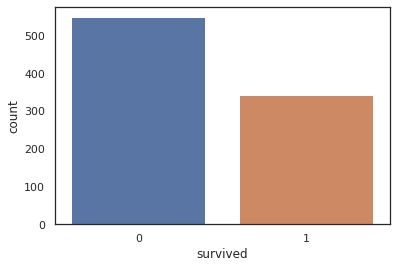

In [255]:
sns.countplot(x = 'survived', data = df_titanic)

Como podemos ver, a variável-resposta 'survived' é binária. Portanto, tudo ok até agora.

### Tratamento dos Missing Values
* Substituir os NaN's por mediana da variável

In [256]:
df_titanic.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
pclass2          0
dtype: int64

Cálculo da mediana da variável/preditora 'age'

In [257]:
df_titanic_copia = df_titanic.copy()
#df_titanic = df_titanic_copia.copy()
df_titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,pclass2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


In [258]:
mediana_age = df_titanic['age'].median()
mediana_fare = df_titanic['fare'].median()

In [259]:
mediana_age

28.0

In [260]:
mediana_fare

14.4542

Substituição dos NaN's da variável 'age' e 'fare' pela respetiva mediana

In [261]:
df_titanic['age'].fillna(mediana_age, inplace = True)
df_titanic.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
pclass2          0
dtype: int64

Dado que fare não possui NaN's, então nada a fazer.

#### Usando Imputer
* Método para tratamento de Missing Values.

In [262]:
from sklearn.impute import SimpleImputer

# fit()
imputer_mv = SimpleImputer(strategy = 'median')
imputer_mv.fit(df_titanic_copia[['age', 'fare']])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [263]:
imputer_mv

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [264]:
# transform()
df_titanic_mediana = pd.DataFrame(imputer_mv.transform(df_titanic[['age', 'fare']]), columns = ['age2', 'fare2'])
df_titanic_mediana.head()

,age2,fare2
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [265]:
df_titanic_mediana.median()

age2     28.0000
fare2    14.4542
dtype: float64

In [266]:
df_titanic_copia.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
pclass2          0
dtype: int64

In [267]:
df_titanic['age'] = df_titanic_mediana['age2']

# Não há NaN's na variável fare. Portanto, nenhuma alteração
#df_titanic['fare'] = df_titanic_mediana['fare']
df_titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,pclass2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


In [268]:
df_titanic.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
pclass2          0
dtype: int64

Exclui as colunas que não são mais necessárias:

In [269]:
df_titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,pclass2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


In [270]:
df_titanic.drop(columns = ['passengerid', 'name', 'ticket', 'cabin'], axis = 1, inplace = True)
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,pclass2
0,0,3,male,22.0,1,0,7.2500,S,3
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,3
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,3


Alternativamente, poderíamos concatenar os dois dataframes usando pd.concat()

In [271]:
df_titanic = df_titanic_copia.copy()

df_titanic.drop(columns = ['passengerid', 'name', 'ticket', 'cabin', 'fare', 'age'], axis = 1, inplace = True)
df_titanic = pd.concat([df_titanic, df_titanic_mediana], axis = 1)
df_titanic.head()

,survived,pclass,sex,sibsp,parch,embarked,pclass2,age2,fare2
0,0,3,male,1,0,S,3,22.0,7.2500
1,1,1,female,1,0,C,1,38.0,71.2833
2,1,3,female,0,0,S,3,26.0,7.9250
3,1,1,female,1,0,S,1,35.0,53.1000
4,0,3,male,0,0,S,3,35.0,8.0500


#### Tratamento dos NaN's da variável 'embarked'

A seguir, listamos as linhas em que embarked = NaN:

In [272]:
embarked_NaN = df_titanic[df_titanic['embarked'].isna()]
embarked_NaN.head()

,survived,pclass,sex,sibsp,parch,embarked,pclass2,age2,fare2
61,1,1,female,0,0,NaN,1,38.0,80.0
829,1,1,female,0,0,NaN,1,62.0,80.0


In [273]:
from sklearn.impute import SimpleImputer

# fit()
imputer_mv = SimpleImputer(strategy = 'most_frequent')
imputer_mv.fit(df_titanic[['embarked']])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [274]:
# transform()
df_embarked_freq = pd.DataFrame(imputer_mv.transform(df_titanic[['embarked']]), columns = ['embarked2'])

In [275]:
df_titanic = pd.concat([df_titanic, df_embarked_freq], axis = 1)
df_titanic.head()

,survived,pclass,sex,sibsp,parch,embarked,pclass2,age2,fare2,embarked2
0,0,3,male,1,0,S,3,22.0,7.2500,S
1,1,1,female,1,0,C,1,38.0,71.2833,C
2,1,3,female,0,0,S,3,26.0,7.9250,S
3,1,1,female,1,0,S,1,35.0,53.1000,S
4,0,3,male,0,0,S,3,35.0,8.0500,S


COMPARE o ANTES e o DEPOIS: Veja a seguir que os valores de [embarked] = NaN foram substituidos por...

In [276]:
embarked_NaN = df_titanic[df_titanic['embarked'].isna()]
embarked_NaN

,survived,pclass,sex,sibsp,parch,embarked,pclass2,age2,fare2,embarked2
61,1,1,female,0,0,NaN,1,38.0,80.0,S
829,1,1,female,0,0,NaN,1,62.0,80.0,S


Como podemos ver, os NaN's da variável embarked foram todos substituídos pelo valor 'S'. Tudo bem para vocês esta substituição?

In [277]:
df_titanic.drop(columns = ['embarked'], axis = 1, inplace = True)

Verificação final dos NaN's:

In [278]:
df_titanic.isna().sum()

survived     0
pclass       0
sex          0
sibsp        0
parch        0
pclass2      0
age2         0
fare2        0
embarked2    0
dtype: int64

### O dataframe sob análise possui (pelo menos) 50 observações para cada preditora?
* Variáveis preditoras: pclass, sex, age, sibsp, parch, fare, embarked2 --> 7 variáveis preditoras.
* Portanto, nosso dataframe precisa de, no mínimo 7 x 50 = 350 linhas.

In [279]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   survived   891 non-null    int64   
 1   pclass     891 non-null    category
 2   sex        891 non-null    object  
 3   sibsp      891 non-null    int64   
 4   parch      891 non-null    int64   
 5   pclass2    891 non-null    category
 6   age2       891 non-null    float64 
 7   fare2      891 non-null    float64 
 8   embarked2  891 non-null    object  
dtypes: category(2), float64(2), int64(3), object(2)
memory usage: 50.8+ KB


In [280]:
891/7

127.28571428571429

Pressuposto atendido?
Se sim, podemos prosseguir com as análises...

#### Avaliação do pressuposto de variáveis preditoras independentes
* Coeficiente de Spearman (desenvolvido por Charles Spearman). Também conhecido como Coeficiente de Correlação de Spearman e denotado pela letra greaga $\rho(p)$.
* É um método estatístico para avaliar/medir a correlação entre 2 variáveis ordinais.

In [281]:
df_titanic.head()

,survived,pclass,sex,sibsp,parch,pclass2,age2,fare2,embarked2
0,0,3,male,1,0,3,22.0,7.2500,S
1,1,1,female,1,0,1,38.0,71.2833,C
2,1,3,female,0,0,3,26.0,7.9250,S
3,1,1,female,1,0,1,35.0,53.1000,S
4,0,3,male,0,0,3,35.0,8.0500,S


A seguir, a hipótese de independência que queremos testar:

$H_{0}$: variáveis são independentes --> Se o p-value < 5% --> Há evidências para rejeitar $H_{0}$.

In [282]:
from scipy.stats import spearmanr

In [283]:
coef, p = spearmanr(df_titanic['pclass'], df_titanic['age'])

KeyError: ignored

In [ ]:
print('Coeficiente de Correlação de Spearman: %.3f' % coef)

# Interpretação da significância:
alpha = 0.05
if p > alpha:
	print('Amostras NÃO correlacionadas (falha em rejeitar H0) p = %.3f' %p)
else:
	print('Amostras correlacionadas (Rejeita H0) p = %.3f' %p)

## Data Transformation
* MinMaxScaler e RobustScaler
* Binning (categorização de variáveis/preditoras numéricas): fare e age
* Outliers

### Tratamento dos Outliers
* variáveis: age e fare

In [ ]:
df_titanic_copia = df_titanic.copy()
#df_titanic = df_titanic_copia.copy()
df_titanic.head()

In [ ]:
from scipy import stats 

def trata_outliers(df, coluna):
    sns.boxplot(x = coluna, data = df)

    # Cálculo de Q1, Q3 e IQR:
    Q1 = np.percentile(df[coluna], 25)
    Q3 = np.percentile(df[coluna], 75)
    IQR = Q3 - Q1
    print(f"IQR: {IQR}")

    # Jeito mais fácil (menos trabalhoso).
    #IQR2 = stats.iqr(df[coluna]) 
    #IQR2 

    # Cálculo dos limites inferiores e superiores para detecção de outliers:
    limite_inferior_outliers = Q1 - 1.5*IQR
    limite_superior_outliers = Q3 + 1.5*IQR
    print(f"Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")

    # Cálculo da mediana
    mediana = df[coluna].median()
    print(f"Mediana: {mediana}")

    # Substituição dos outliers:
    df[coluna+'_o'] = df[coluna]

    df.loc[df[coluna] > limite_superior_outliers, coluna+'_o'] = np.nan
    df[coluna+'_o'].fillna(mediana, inplace = True) # 'o' significa tratamento outlier --> indicação para mostrar que a coluna passou pelo tratamento dos outliers.

    return df, limite_superior_outliers

In [ ]:
df_titanic, limite_superior_outliers = trata_outliers(df = df_titanic, coluna = 'age')

In [ ]:
df_titanic.head(20)

### Quem são os outliers de 'age'?

In [ ]:
age_outlier = df_titanic[df_titanic['age'] > limite_superior_outliers]
age_outlier.head()

### Tratamento dos outliers da variável 'fare'

In [ ]:
df_titanic_copia = df_titanic.copy()
df_titanic.head()

In [ ]:
df_titanic, limite_superior_outliers = trata_outliers(df = df_titanic, coluna = 'fare')

### Quem são os outliers de 'fare'?

In [ ]:
limite_superior_outliers

In [ ]:
fare_outlier = df_titanic[df_titanic['fare'] > limite_superior_outliers]
fare_outlier.head()

### Binning variáveis numéricas: age e fare

In [ ]:
#df_titanic_copia = df_titanic.copy()
df_titanic = df_titanic_copia.copy()
df_titanic.head()

#### Usando cut()

In [ ]:
#df_titanic['age_bins'] = pd.cut(x = df_titanic['age_o'], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
df_titanic['age_bins'] = pd.cut(x = df_titanic['age_o'], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90], labels = [10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
df_titanic.head(7)

#### **Desafio**: Qual seria o corte ótimo para 'age' usando DecisionTree?

In [ ]:
df_titanic['age_bins_cut1'].value_counts()

#### Usando qcut()

In [ ]:
df_titanic['age_bins_qcut'] = pd.qcut(x = df_titanic['age'], q = 5, labels = [1, 2, 3, 4], duplicates = 'drop')
df_titanic.head()

In [ ]:
df_titanic.dtypes

In [ ]:
l_colunas_numericas = list(df_titanic.select_dtypes('int').columns)
l_colunas_numericas

for coluna in l_colunas_numericas:
    trata_outliers(df, coluna)
    trata_missing_values(df, coluna)
    aplica_MMS(df, coluna)
    aplica_RS(df, coluna)

In [ ]:
df_titanic['age_bins_qcut'].value_counts()

### MinMaxScaler() e RobustScaler()
* age e fare

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [ ]:
mms = MinMaxScaler()
rs = RobustScaler()

In [ ]:
df_titanic.head()

In [ ]:
df_titanic_copia = df_titanic.copy()
df_titanic.head()

A seguir, deletar as variáveis que desnecessárias...

In [ ]:
df_titanic.drop(columns = ['age', 'fare'], axis = 1, inplace = True)

In [ ]:
# fit
df_titanic_mms = pd.DataFrame(mms.fit_transform(df_titanic[['age_o', 'fare_o']]), columns = ['age_mms', 'fare_mms'])
df_titanic_rs = pd.DataFrame(rs.fit_transform(df_titanic[['age_o', 'fare_o']]), columns = ['age_rs', 'fare_rs'])

df_titanic['age_mms'] = df_titanic_mms['age_mms']
df_titanic['age_rs'] = df_titanic_rs['age_rs']

df_titanic['fare_mms'] = df_titanic_mms['fare_mms']
df_titanic['fare_rs'] = df_titanic_rs['fare_rs']

df_titanic.head()

In [ ]:
# Categorizando as variáveis transformadas
df_titanic['age_bins_mms'] = pd.qcut(x = df_titanic['age_mms'], q = 5, duplicates = 'drop', labels = [1, 2, 3, 4])
df_titanic['age_bins_rs'] = pd.qcut(x = df_titanic['age_rs'], q = 5, labels = [1, 2, 3, 4], duplicates = 'drop')

df_titanic['fare_bins_mms'] = pd.qcut(x = df_titanic['fare_mms'], q = 5, labels = [1, 2, 3, 4], duplicates = 'drop')
df_titanic['fare_bins_rs'] = pd.qcut(x = df_titanic['fare_rs'], q = 5, labels = [1, 2, 3, 4], duplicates = 'drop')

In [ ]:
df_titanic.drop(columns = ['age_o', 'fare_o', 'age_bins_cut2', 'age_mms', 'age_rs', 'fare_mms', 'fare_rs'], axis = 1, inplace = True)
df_titanic.head()

### Variáveis Dummy

In [ ]:
df_titanic.head()

In [ ]:
dummy = pd.get_dummies(df_titanic[['sex', 'ambarked2']])
dummy

In [ ]:
df_titanic2 = pd.concat([df_titanic, dummy], axis = 1)
df_titanic2.head()

In [ ]:
df_titanic['pclass'].value_counts() # Quem será a referência?

In [ ]:
df_titanic['pclass'] = df_titanic['pclass'].astype('category')

### Definir as amostras de treinamento e validação

In [ ]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split()

In [ ]:
df_titanic.head()

In [ ]:
df_titanic['pclass'].value_counts()

In [ ]:
modelo = smf.glm(formula = 'survived ~ age3 + pclass + sex', data = df_titanic, family = sm.families.Binomial()).fit()
print(modelo.summary())

Qual a significância dos coeficientes (p-value abaixo de 0.05 adotando confiança de 95%)?

### Interpretação dos coeficientes:

* Pessoas que viajavam na segunda classe possuem menos chances de sobrevivência do que quem viajava na primeira.
* Quem viajava na terceira classe possui menos chances ainda.
* Homens possuem menos chances de sobrevivência do que mulheres. Quanto mais velho, menores as chances de sobrevivência.

### Coeficientes mais interpretáveis - Chances relativas de Sobrevivência

In [ ]:
print(np.exp(modelo.params[1:]))

* Pessoas que viajavam na segunda classe tinham 0.27 das chances de sobrevivência que as pessoas da primeira classe tinham. 
* Pessoas da terceira classe tinham 0.076 das chances que as pessoas da primeira classe tinham. 
* Homens tinham 0.08 das chances das mulheres.

### Comparando com a regressão Linear

In [ ]:
(np.exp(modelo.params[1:]) - 1) * 100

* Pessoas da segunda classe tem 73% menos chances de sobrevivência do que pessoas da primeira classe.
* Pessoas da terceira classe tem 92% menos chances de sobrevivência que pessoas da primeira classe.
* Homens tem 92% menos chances de sobrevivência do que mulheres.
* Para cada ano a mais de idade, as chances diminuem 3.63%.

### Qualidade do modelo

In [ ]:
modelo2 = LogisticRegression(penalty='none', solver='newton-cg')
df_titanic2 = df_titanic[['Survived', 'Pclass', 'Sex', 'Age']].dropna()
y = df_titanic2['Survived']
X = pd.get_dummies(df_titanic2[['Pclass', 'Sex', 'Age']], drop_first=True)

In [ ]:
modelo2.fit(X, y)

In [ ]:
y_pred = modelo2.predict_proba(X)

In [ ]:
confusion_matrix(y, model.predict(X))

In [ ]:
acuracia = accuracy_score(y, model.predict(X))

In [ ]:
print(classification_report(y, model.predict(X)))

In [ ]:
confusion_matrix(y, modelo.predict(X)) # usando a função do sklearn

In [ ]:
def plot_roc_curve(y_true, y_score, figsize=(10,6)):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.figure(figsize=figsize)
    auc_value = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
plot_roc_curve(y, y_pred)

### Predições

In [ ]:
eu = pd.DataFrame({'Age':32, 'Pclass_2':0, 'Pclass_3':1, 'Sex_male':1}, index=[0])
minha_prob = model.predict_proba(eu)
print('Eu teria {}% de probabilidade de sobrevivência se estivesse no Titanic'\
      .format(round(minha_prob[:,1][0]*100, 2)))

Eu teria 7.52% de probabilidade de sobrevivência se estivesse no Titanic

In [ ]:
coleguinha = pd.DataFrame({'Age':32, 'Pclass_2':0, 'Pclass_3':0, 'Sex_male':1}, index=[0])
prob_do_coleguinha = model.predict_proba(coleguinha)
print('Meu coleguinha teria {}% de probabilidade de sobrevivência se estivesse no Titanic'\
      .format(round(prob_do_coleguinha[:,1][0]*100, 2)))

Meu coleguinha teria 51.77% de probabilidade de sobrevivência se estivesse no Titanic

# Exemplo 2

In [ ]:
# Carrega as bibliotecas
import numpy as np
np.set_printoptions(formatter = {'float': lambda x: "{0:0.2f}".format(x)})

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

%matplotlib inline

In [ ]:
# Carregar/ler o banco de dados - Dataframe Diabetes
from sklearn import datasets
#Diabetes = datasets.load_diabetes()

url = 'https://raw.githubusercontent.com/MathMachado/DSWP/master/Dataframes/diabetes.csv'
diabetes = pd.read_csv(url)
diabetes.head()

In [ ]:
# Definir as matrizes X e y
X_diabetes = diabetes.copy()
X_diabetes.drop(columns = ['Outcome'], axis = 1, inplace = True)
y_diabetes = diabetes['Outcome']

X_diabetes.head()

In [ ]:
X_diabetes.shape

In [ ]:
y_diabetes.shape

In [ ]:
# Definir as matrizes de treinamento e validação
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_diabetes, y_diabetes)

In [ ]:
# Usando statmodels:
x = sm.add_constant(X_treinamento)
lr_sm = sm.Logit(y_treinamento, X_treinamento) # Atenção: aqui é o contrário: [y, x]

# Treinar o modelo
lr.fit(X_treinamento, y_treinamento)
resultado_sm = lr_sm.fit()

In [ ]:
resultado_sm.summary()

In [ ]:
# EQM - Erro Quadrático Médio
np.mean((resultado_sm.predict(X_teste) - y_teste) ** 2) 

### Calcular y_pred - os valores preditos de y

In [ ]:
y_pred = resultado_sm.predict(X_treinamento)

In [ ]:
compara = list(zip(np.array(diabetes['Outcome']), resultado_sm.predict()))
compara[0:30]

In [ ]:
resultado_sm.pred_table()

In [ ]:
confusion_matrix = pd.DataFrame(resultado_sm.pred_table())
confusion_matrix.columns = ['Predicted No Diabetes', 'Predicted Diabetes']
confusion_matrix = confusion_matrix.rename(index = {0 : 'Actual No Diabetes', 1 : 'Actual Diabetes'})
confusion_matrix

In [ ]:
cm = np.array(confusion_matrix)
training_accuracy = (cm[0,0] + cm[1,1])/ cm.sum()
training_accuracy

# Exercício 1 - Mall_Customers.csv
> A variável-target deste dataframe é 'Annual Income'. Desenvolva um modelo de regressão utilizando OLS, Ridge e LASSO e compare os resultados.

* Experimente:
    * Lasso(alpha = 0.01, max_iter = 10e5);
    * Lasso(alpha = 0.0001, max_iter = 10e5);
    * Ridge(alpha = 0.01);
    * Ridge(alpha = 100);

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Dados

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. It includes 41188 records and 21 fields.

In [ ]:
df_bank = pd.read_csv('https://raw.githubusercontent.com/MathMachado/DataFrames/master/bank-full.csv', header = 0)
df_bank = df_bank.dropna()
print(df_bank.shape)
print(list(df_bank.columns))

In [ ]:
df_bank.head()

#### Input variables

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric) 

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

#### Predict variable (desired target):

y - has the client subscribed a term deposit? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [ ]:
df_bank['education'].unique()

Let us group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

In [ ]:
df_bank['education']=np.where(df_bank['education'] =='basic.9y', 'Basic', df_bank['education'])
df_bank['education']=np.where(df_bank['education'] =='basic.6y', 'Basic', df_bank['education'])
df_bank['education']=np.where(df_bank['education'] =='basic.4y', 'Basic', df_bank['education'])

After grouping, this is the columns

In [ ]:
df_bank['education'].unique()

### Data exploration

In [ ]:
df_bank['y'].value_counts()

In [ ]:
sns.countplot(x='y',data=df_bank, palette='hls')
plt.show()
plt.savefig('count_plot')

There are 36548 no's and 4640 yes's in the outcome variables.

Let's get a sense of the numbers across the two classes

In [ ]:
df_bank.groupby('y').mean()

Observations:

The average age of customers who bought the term deposit is higher than that of the customers who didn't.
The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [ ]:
df_bank.groupby('job').mean()

In [ ]:
df_bank.groupby('marital').mean()

In [ ]:
df_bank.groupby('education').mean()

Visualizations

In [ ]:
%matplotlib inline
pd.crosstab(df_bank.job,df_bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

In [ ]:
table=pd.crosstab(df_bank.marital,df_bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

Hard to see, but the marital status does not seem a strong predictor for the outcome variable.

In [ ]:
table=pd.crosstab(df_bank.education,df_bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

Education seems a good predictor of the outcome variable.

In [ ]:
pd.crosstab(df_bank.day_of_week,df_bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

Day of week may not be a good predictor of the outcome

In [ ]:
pd.crosstab(df_bank.month,df_bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

Month might be a good predictor of the outcome variable

In [ ]:
df_bank.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

The most of the customers of the bank in this dataset are in the age range of 30-40.

In [ ]:
pd.crosstab(df_bank.poutcome,df_bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

Poutcome seems to be a good predictor of the outcome variable.

### Create dummy variables

In [ ]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df_bank[var], prefix=var)
    df_bank1=df_bank.join(cat_list)
    data=df_bank1

In [ ]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
df_bank_vars=df_bank.columns.values.tolist()
to_keep=[i for i in df_bank_vars if i not in cat_vars]

In [ ]:
df_bank_final=df_bank[to_keep]
df_bank_final.columns.values

In [ ]:
df_bank_final_vars=df_bank_final.columns.values.tolist()
y=['y']
X=[i for i in df_bank_final_vars if i not in y]

### Feature Selection

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(df_bank_final[X], df_bank_final[y] )
print(rfe.support_)
print(rfe.ranking_)

The Recursive Feature Elimination (RFE) has helped us select the following features: "previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", "poutcome_failure", "poutcome_nonexistent", "poutcome_success".

In [ ]:
cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 
X=df_bank_final[cols]
y=df_bank_final['y']

### Implementing the model

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

The p-values for most of the variables are very small, therefore, most of them are significant to the model.

### Logistic Regression Model Fitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#### Predicting the test set results and caculating the accuracy

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

### Cross Validation

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

The result is telling us that we have 10872+254 correct predictions and 1122+109 incorrect predictions.

#### Accuracy

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#### Interpretation: 

Of the entire test set, 88% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 90% of the customer's preferred term deposit were promoted.

### ROC Curvefrom sklearn import metrics
from ggplot import *

prob = clf1.predict_proba(X_test)[:,1]
fpr, sensitivity, _ = metrics.roc_curve(Y_test, prob)

df = pd.DataFrame(dict(fpr=fpr, sensitivity=sensitivity))
ggplot(df, aes(x='fpr', y='sensitivity')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()